## **Assignment:** Stock Prediction using Linear Regression (dataset: AAPL_Stock.csv)

In [ ]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics


Index(['Open', 'High', 'Low', 'Close(t)', 'Volume', 'SD20', 'Upper_Band',
       'Lower_Band', 'S_Close(t-1)', 'S_Close(t-2)', 'S_Close(t-3)',
       'S_Close(t-5)', 'S_Open(t-1)', 'MA5', 'MA10', 'MA20', 'MA50', 'MA200',
       'EMA10', 'EMA20', 'EMA50', 'EMA100', 'EMA200', 'MACD', 'MACD_EMA',
       'ATR', 'ADX', 'CCI', 'ROC', 'RSI', 'William%R', 'SO%K', 'STD5',
       'ForceIndex1', 'ForceIndex20', 'Date_col', 'Day', 'DayofWeek',
       'DayofYear', 'Week', 'Is_month_end', 'Is_month_start', 'Is_quarter_end',
       'Is_quarter_start', 'Is_year_end', 'Is_year_start', 'Is_leap_year',
       'Year', 'Month', 'QQQ_Close', 'QQQ(t-1)', 'QQQ(t-2)', 'QQQ(t-5)',
       'QQQ_MA10', 'QQQ_MA20', 'QQQ_MA50', 'SnP_Close', 'SnP(t-1))',
       'SnP(t-5)', 'DJIA_Close', 'DJIA(t-1))', 'DJIA(t-5)', 'Close_forcast'],
      dtype='object')
(3732, 63)
Index(['Open', 'High', 'Low', 'Close(t)', 'Volume', 'SD20', 'Upper_Band',
       'Lower_Band', 'S_Close(t-1)', 'S_Close(t-2)', 'S_Close(t-3)',
       'S_Clo

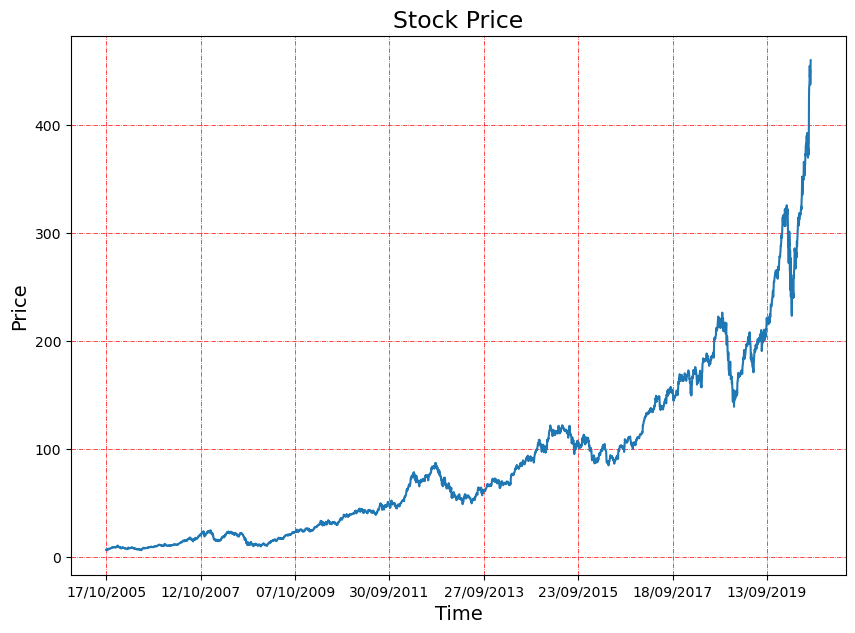

In [3]:
# Data Obtaining and preprocessing

df_Stock = pd.read_csv('./datasets/AAPL_Stock.csv',  index_col=0)
#index_col: to set which columns to be used as the index of the dataframe.  default=None,
# pandas will add a new column start from 0 to specify the index column. It can be set as a column name or column index, which will be used as the index column.
print(df_Stock.columns)
#df_Stock = df_Stock.rename(columns={'Close(t)':'Close'}) #rename the old name of the column 'clost(t)' to newname 'close'

print(df_Stock.shape)
print(df_Stock.columns)

df_Stock.head()

df_Stock['Close(t)'].plot(figsize=(10, 7))
plt.title("Stock Price", fontsize=17)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.grid(which="major", color='r', linestyle='-.', linewidth=0.5)
plt.show()

df_Stock = df_Stock.drop(columns='Date_col') # this column cannot be used to fit, because it isn't a numeric value

In [4]:
# Function to segregate the data into training, validation, testing set
def create_train_test_set(df_Stock):
    features = df_Stock.drop(columns=['Close_forcast'], axis=1) # Removing target column
    target = df_Stock['Close_forcast'] # Target
    # df.shape() = returns (number of rows, number of columns)
    no_samples = df_Stock.shape[0] # df.shape[0] = number of samples in the 0th dimension ie the number of rows only
    print('Data size is ', str(no_samples))

    train_split = int(no_samples  * 0.88)
    print('Training Set length - ', str(train_split))

    val_split = train_split + int(no_samples  * 0.1)
    print('Validation Set length - ', str(int(no_samples  * 0.1)))

    print('Test Set length - ', str(int(no_samples  * 0.02)))
    # Out of 3732 rows, training=(0-3283), validation=(3284-3656), testing=(3657-3732)
    X_train, X_val, X_test = features[:train_split], features[train_split:val_split], features[val_split:]
    Y_train, Y_val, Y_test = target[:train_split], target[train_split:val_split], target[val_split:]

    #print shape of samples
    print(X_train.shape, X_val.shape, X_test.shape)
    print(Y_train.shape, Y_val.shape, Y_test.shape)

    return X_train, X_val, X_test, Y_train, Y_val, Y_test

# Linear Regression
## Types:
- Simple: If there is only 1 column (x), and data can be fit into a straight line.
- Multiple: If there are >1 columns, and data can be fit into a straight line.
- Polynomial: If there are >1 columns, and data can't be fit into a straight line, so we need to fit it into a curve.

- Formula: $m_1x_1+m_2x_2+...+b$
    - $m_i$=Coefficient
    - $x_i$=Input
    - $b$=Intercept
- Variables:
    - MAPE: Mean Absolute Percentage Error
    - MSE: Mean Squared Error
    - RMSE: Root Mean Squared Error

In [5]:
# MODEL: Linear Regression
from sklearn.linear_model import LinearRegression

# Dataset
X_train, X_val, X_test, Y_train, Y_val, Y_test = create_train_test_set(df_Stock)

lr = LinearRegression()
lr.fit(X_train, Y_train)
print('LR Coefficients: \n', lr.coef_)
print('LR Intercept: \n', lr.intercept_)
print("Performance (R^2): ", lr.score(X_train, Y_train))

def get_mape(y_true, y_pred):
    #    Compute mean absolute percentage error (MAPE)
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

Y_train_pred = lr.predict(X_train)
Y_val_pred = lr.predict(X_val)
Y_test_pred = lr.predict(X_test)

print("Training R-squared: ",round(metrics.r2_score(Y_train,Y_train_pred),2))
print('Training MAPE:', round(get_mape(Y_train,Y_train_pred), 2))
print('Training Mean Squared Error:', round(metrics.mean_squared_error(Y_train,Y_train_pred), 2))
print("Training RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_train,Y_train_pred)),2))
print(' ')

print("Validation R-squared: ",round(metrics.r2_score(Y_val,Y_val_pred),2))
print('Validation MAPE:', round(get_mape(Y_val,Y_val_pred), 2))
print('Validation Mean Squared Error:', round(metrics.mean_squared_error(Y_train,Y_train_pred), 2))
print("Validation RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_val,Y_val_pred)),2))

print(' ')

print("Test R-squared: ",round(metrics.r2_score(Y_test,Y_test_pred),2))
print('Test MAPE:', round(get_mape(Y_test,Y_test_pred), 2))
print('Test Mean Squared Error:', round(metrics.mean_squared_error(Y_test,Y_test_pred), 2))
print("Test RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_test,Y_test_pred)),2))
print("Test MAE: ",round(metrics.mean_absolute_error(Y_test,Y_test_pred),2))

Data size is  3732
Training Set length -  3284
Validation Set length -  373
Test Set length -  74
(3284, 61) (373, 61) (75, 61)
(3284,) (373,) (75,)
LR Coefficients: 
 [ 8.63706217e-03  1.86051995e-01  1.55487180e-01  1.12263805e+00
  1.27286960e-10  6.75264327e-03  1.40229103e-01  1.13219410e-01
  4.25631962e-02  8.96350409e-02  1.01915038e-01  5.94184228e-02
  7.95194193e-02  7.10405383e-02  2.71425342e-01  1.26724288e-01
  8.79333478e-02 -5.87980245e-03 -3.31643840e-01 -3.31643840e-01
 -3.31643840e-01 -3.31643840e-01 -3.31643840e-01  1.88649993e+00
 -1.27270698e+00 -1.65042219e-01 -4.36658412e-04  8.02136138e-15
 -5.07434280e-03  9.02936603e-03  5.78318504e-04  5.78315513e-04
 -5.57917855e-01 -2.02304395e-10  4.18931972e-11  1.69322441e-02
  1.61636718e-02 -1.75659582e-02  6.12165484e-03  2.15420349e-01
  1.13979654e-01 -2.41954684e-01  7.63050234e-02  3.73276589e-01
 -1.16573418e-15 -5.60844001e-02  4.08788807e-02  5.13473867e-01
 -2.94431586e-02 -8.41335031e-02  5.10939107e-02 -8.